In [12]:
file_paths = ["/home/qianxu/Desktop/Project/DexPose/human_sequences.pth", "/home/qianxu/Desktop/Project/DexPose/human_sequences_1.pth"]

for file_path in file_paths:
    import human_sequence_data

    import torch
    with open(file_path, "rb") as f:
        data = torch.load(f)


    def to_dict(self):
        data_dict = {
            # Hand data
            'hand_tsls': self.hand_tsls if self.hand_tsls is not None else None,
            'hand_coeffs': self.hand_coeffs if self.hand_coeffs is not None else None,
            'side': self.side,
            'hand_joints': self.hand_joints if self.hand_joints is not None else None,

            # Object data
            'obj_poses': self.obj_poses if self.obj_poses is not None else None,
            'object_names': self.object_names,
            'object_mesh_path': self.object_mesh_path,
            'object_points_ls': self.object_points_ls,
            'object_features_ls': self.object_features_ls,
            'mesh_norm_trans': torch.stack(self.mesh_norm_trans),

            # Metadata
            'frame_indices': self.frame_indices,
            'task_description': self.task_description,
            'which_dataset': self.which_dataset,
            'which_sequence': self.which_sequence,
            'extra_info': self.extra_info,
        }
        # change '/home/qianxu/Project24/TACO_Instructions/data/' in every item in 'object_mesh_path' to '/home/qianxu/Desktop/Project/DexPose/data/Taco/'
        data_dict['object_mesh_path'] = [i.replace('/home/qianxu/Project24/TACO_Instructions/data/', '/home/qianxu/Desktop/Project/DexPose/data/Taco/') for i in data_dict['object_mesh_path']]
        return data_dict


    data_dict = [to_dict(item) for item in data]
    print("Here!")


    # object = set(
    #     name for item in data_dict       # 外层循环：遍历每个字典
    #     for name in item['object_mesh_path'] # 内层循环：遍历字典中的名字列表
    # )
    # print(f"Total number of objects: {len(object)}")
    # # count left hand and right hand
    # left_hand_count = sum(1 for item in data_dict if item['side'] == 0)
    # right_hand_count = sum(1 for item in data_dict if item['side'] == 1)
    # print(f"Total number of left hand objects: {left_hand_count}")
    # print(f"Total number of right hand objects: {right_hand_count}")


    # for all item in data_dict, turn hand_coeffs which is [120, 96] into [120, 16, 6] (which is in rot6d) and turn into quaterion [120, 16, 4]
    # from pytorch3d.transforms import rotation_6d_to_matrix, matrix_to_quaternion
    # for item in data_dict:
    #     hand_coeffs = item['hand_coeffs'].reshape(120, 16, 6)
    #     hand_quats = matrix_to_quaternion(rotation_6d_to_matrix(hand_coeffs))
    #     item['hand_coeffs'] = hand_quats

    # torch.save(data_dict, "/home/qianxu/Desktop/Project/DexPose/data_dict_wqx.pth")
    print(data_dict[0].keys(), data_dict[0]['hand_coeffs'].shape)

Here!
dict_keys(['hand_tsls', 'hand_coeffs', 'side', 'hand_joints', 'obj_poses', 'object_names', 'object_mesh_path', 'object_points_ls', 'object_features_ls', 'mesh_norm_trans', 'frame_indices', 'task_description', 'which_dataset', 'which_sequence', 'extra_info']) torch.Size([120, 96])
Here!
dict_keys(['hand_tsls', 'hand_coeffs', 'side', 'hand_joints', 'obj_poses', 'object_names', 'object_mesh_path', 'object_points_ls', 'object_features_ls', 'mesh_norm_trans', 'frame_indices', 'task_description', 'which_dataset', 'which_sequence', 'extra_info']) torch.Size([120, 16, 4])


In [6]:
from utils.vis_utils import vis_as_frame, visualize_human_sequence
import torch
data_dict = torch.load("/home/qianxu/Desktop/Project/DexPose/data_dict_wqx_1.pth")
# vis_grid(data_dict, "vis_(data_dict_wqx_1)_grid")
# vis_as_frame(data_dict, "vis_(data_dict_wqx_1)_frame")
visualize_human_sequence(
    data_dict[109],
    filename="vis_(data_dict_wqx_1)_109")

Text(0, 0.5, 'Loss')

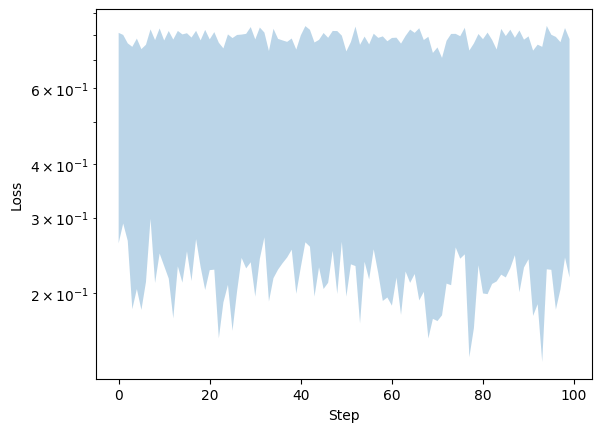

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import torch

plt.figure()
logger = {'losses': {"E": []}}
for i in range(100):
    logger['losses']["E"].append(torch.rand((100)).numpy())
for lr in logger['losses']:
    # logger['losses'][lr] is a list of T*1 tensors, not a list of floats. I want to draw the area that is filled between the curve and the x-axis
    y_mean, y_std = np.mean(logger['losses'][lr], axis=0), np.std(logger['losses'][lr], axis=0)
    plt.fill_between(np.arange(len(logger['losses'][lr])), y_mean - y_std, y_mean + y_std, alpha=0.3)
plt.yscale('log')
plt.xlabel("Step")
plt.ylabel("Loss")